In [0]:
import tensorflow as tf

# Intoduction

## Constants

### Simple constant declaration

In [0]:
a = tf.constant(7)  # 0D tensor (scalar)
b = tf.constant([1, 7])  # 1D tensor (vector)
c = tf.constant([[3, 1],
                 [4, 6]])  # 2D tensor (matrix)
d = tf.constant([[[1, 2],
                  [2, 3]],
                 [[9, 7],
                  [8, 6]]])  # 3D tensor

In [0]:
with tf.Session() as sess:
  print(sess.run(a))
  print(sess.run(b))
  print(sess.run(c))
  print(sess.run(d))
  print(sess.run(tf.multiply(b, c)))  # elementwise multiplication
  # since b and c are different in size, Python duplicates b to have the same
  # size as c. This is called broadcasting.
  # this method of calling a function inside sess.run is not recommended,
  # because TF does lazy loading and it will be slower since TF doesn't know
  # how the graph looks like before execution.

7
[1 7]
[[3 1]
 [4 6]]
[[[1 2]
  [2 3]]

 [[9 7]
  [8 6]]]
[[ 3  7]
 [ 4 42]]


### Useful functions

In [0]:
z1 = tf.zeros([2, 3])
z2 = tf.zeros_like(c)  # creates a tensor the same size as c and fills it with 0

o1 = tf.zeros([3, 4, 2])
o2 = tf.zeros_like(c)  # creates a tensor the same size as c and fills it with 1

f1 = tf.fill([3, 4], 7)  # creates a tensor and fills it with the given value

with tf.Session() as sess:
  print(sess.run(z1))
  print(sess.run(z2))
  print(sess.run(o1))
  print(sess.run(o2))
  print(sess.run(f1))
  

[[0. 0. 0.]
 [0. 0. 0.]]
[[0 0]
 [0 0]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
[[0 0]
 [0 0]]
[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]


In [0]:
lin = tf.lin_space(10.0, 13.0, 4)  # create an interval of "c" equally spaced
# numbers from a to b

r1 = tf.range(3, 18, 3)  # create an interval of numbers from a to b with step c
r2 = tf.range(5)  # create a sequence from zero with interval 1

with tf.Session() as sess:
  print(sess.run(lin))
  print(sess.run(r1))

[10. 11. 12. 13.]
[ 3  6  9 12 15]


In [0]:
# tf.set_random_seed(1234)  # set the seed for random functions

n1 = tf.random_normal((2, 3), mean=0.7, stddev=0.5)
n2 = tf.random_uniform((2, 3), minval=1, maxval=2)

n3 = tf.random_shuffle(tf.range(10), seed=1234)

with tf.Session() as sess:
  print(sess.run(n1))
  print(sess.run(n2))
  print(sess.run(n3))

[[0.01777178 1.0937501  0.84406036]
 [2.2528095  0.94065094 0.40548307]]
[[1.3645172 1.5665481 1.5244945]
 [1.9008095 1.5330622 1.625128 ]]
[9 4 5 6 1 3 8 0 7 2]


## Variables
Variables are classes. They need to be initialized. We can either initialize all variables globally, or locally (keep others intact).

In [0]:
tf.reset_default_graph()  # resets the graph so that we start from scratch

In [0]:
a = tf.Variable(4)
b = tf.Variable([[3, 7], [4, 6]])

op1 = a.assign(2)
op2 = a.assign(2*a)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # print(sess.run(a))  # this is the way to evaluate constants.
  print(a.eval())  # this is the way to evaluate variables.
  print(b.eval())
  sess.run(op1)
  print(a.eval())
  sess.run(tf.global_variables_initializer())
  sess.run(op2)
  print(a.eval())
  sess.run(op2)
  print(a.eval())
  

Instructions for updating:
Colocations handled automatically by placer.
4
[[3 7]
 [4 6]]
2
8
16


## Placeholders

In [0]:
a = tf.placeholder(tf.float32, shape=[2, 2])  # create a placeholder (dummy var)
b = tf.constant([[5, 5], [5, 5]], tf.float32)

op = a + b

with tf.Session() as sess:
  print(sess.run(op, feed_dict={a: [[1, 2], [3, 4]]}))  # since "a" is a
  # placeholder, I need to feed the values I want to it in order to run it.

[[6. 7.]
 [8. 9.]]


# First image classifier

## Cats and Dogs

In [0]:
# download the dataset from the web
!wget https://user.engineering.uiowa.edu/~sbaek/files/cats_and_dogs.zip

--2019-03-05 18:44:01--  https://user.engineering.uiowa.edu/~sbaek/files/cats_and_dogs.zip
Resolving user.engineering.uiowa.edu (user.engineering.uiowa.edu)... 128.255.17.187
Connecting to user.engineering.uiowa.edu (user.engineering.uiowa.edu)|128.255.17.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>] 786.68M  37.8MB/s    in 32s     

2019-03-05 18:44:39 (24.3 MB/s) - ‘cats_and_dogs.zip’ saved [824894548/824894548]



In [0]:
# unzip the zip file
# -q makes it quite (no logs)
!unzip -q cats_and_dogs.zip

In [0]:
# list files
!ls PetImages/Cat

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

In [0]:
# read and display images

import cv2  # import openCV library

# read an image from a file
img = cv2.imread('PetImages/Dog/512.jpg')

print(img.shape)  # shows the number of rows, columns, and 3 for the number
# of channels

(385, 500, 3)


In [0]:
import os

# list of files in a directory
catlist = os.listdir('PetImages/Cat')
doglist = os.listdir('PetImages/Dog')

x = []
y = []

# go through all images and append the resized and rescaled version of them to
# the stack of images.
for f in catlist:
  if f.endswith('.jpg'):
    img = cv2.imread('PetImages/Cat/' + f)
    if img is not None:
      x.append(cv2.resize(img, (28, 28)))
      y.append([1, 0])

for f in doglist:
  if f.endswith('.jpg'):
    img = cv2.imread('PetImages/Dog/' + f)
    if img is not None:
      x.append(cv2.resize(img, (28, 28)))
      y.append([0, 1])


In [0]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None, 28, 28, 3])  # A list of unknown number of
# 28x28 3 channel photos
Y = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable(tf.zeros([28*28*3, 2]))
b = tf.Variable(tf.zeros([2]))

# compute f = WX + b
# -1 in reshape means the function will figure out that dimension
# we do X*W, which is because X is treated as a row vector, not a column vector
z = tf.matmul(tf.reshape(X, [-1, 28*28*3]), W) + b
f = tf.nn.softmax(z)

In [0]:
# cross entropy
e = -tf.reduce_sum(Y * tf.log(f))

# is Y and f equal?!
is_correct =  tf.equal(tf.argmax(f, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  # accuracy percentage

optimizer = tf.train.AdamOptimizer(0.01).minimize(e)

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(100):
    sess.run(optimizer, feed_dict={X: x, Y: y})
    accuracy_val = sess.run(accuracy, feed_dict={X: x, Y: y})
    print(i, accuracy_val)

#Second Model

In [0]:
# 1. Download the dataset
!wget https://user.engineering.uiowa.edu/~sbaek/files/cats_and_dogs.zip  # '!wget' command allows you to download files to your virtual machine
!unzip -q cats_and_dogs.zip # '!unzip' is for extracting zip compressed files. '-q' is a toggle option for 'quiet' (otherwise, it will produce a long log).


# 2. Read the dataset
import os  # import os library for reading file paths
import cv2 # import opencv library for image handling

from tqdm import tqdm   # tqdm is a useful library for visualizing a small progress bar when you run a for loop.

cat_list = ['PetImages/Cat/' + file for file in os.listdir('PetImages/Cat') if file.endswith('.jpg')]   # file paths for cat images
dog_list = ['PetImages/Dog/' + file for file in os.listdir('PetImages/Cat') if file.endswith('.jpg')]   # file paths for dog images

x = [] # empty list for storing images
y = [] # empty list for storing image labels. we will use one-hot encoding [1, 0] = cat, [0, 1] = dog

for f in tqdm(cat_list): # this is how you use tqdm
# for f in cat_list: # this is without-tqdm version
  img = cv2.imread(f)  # read an image from the file list
  if img is not None:  # if image reading successful
    x.append(cv2.resize(img, (28,28))/255.0)  # append new image to the image list. resize and normalize before to append.
    y.append([1, 0])  # append new label to the label list
  
for f in tqdm(dog_list):
  img = cv2.imread(f)
  if img is not None:
    x.append(cv2.resize(img, (28,28))/255.0)
    y.append([0,1])
 

# 3. Train-test split
from sklearn.model_selection import train_test_split
import time # this is for generating random seed

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=int(time.time()))

print(len(x), len(train_x), len(test_x))



# 4. Build a model 
import tensorflow as tf

# placeholder for the dataset
X = tf.placeholder(tf.float32, [None, 28, 28, 3])
Y = tf.placeholder(tf.float32, [None, 2])

# model parameters
W = tf.Variable(tf.zeros([2352, 2]))
b = tf.Variable(tf.zeros([2]))

# model ops
Z = tf.matmul(tf.reshape(X, [-1, 2352]), W) + b
f = tf.divide(tf.exp(Z), tf.reduce_sum(tf.exp(Z)))
# f = tf.nn.softmax(Z)  # tensorflow provides softmax function for your convenience


# 5. Design an optimizer
e = -tf.reduce_sum(Y * tf.log(f)) # cross entropy loss
optimizer = tf.train.AdamOptimizer(0.01).minimize(e) # adam optimizer

# accuracy. (cross entropy can be less intuitive. a good practice would be to trace accuracy alongside cross entropy
is_correct = tf.equal(tf.argmax(f,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


# 6. Train
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer()) # we have variables W and b which need to be initialized
  
  for i in range(100): # for some fixed number of iterations
    sess.run(optimizer, feed_dict={X: train_x, Y: train_y}) # run one step of iteration
    acc, ce = sess.run([accuracy, e], feed_dict={X: train_x, Y: train_y}) # evaluate accuracy and cross entropy error
    print(i, acc, ce) # print them
    
  acc, ce = sess.run([accuracy, e], feed_dict={X: test_x, Y: test_y}) # when the iteration is over, test the model against the test dataset
  print('TEST', acc, ce)

In [0]:
yb = []
for i in range(len(y)):  # y[i] = [1,0] or [0,1]
  yb.append( [ y[i][0] ] )
  
train_x, test_x, train_yb, test_yb = train_test_split(x, yb, test_size=0.3)

## Using step function

### Step 1: Model definition

In [0]:
X = tf.placeholder(tf.float32, [None, 28, 28, 3])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([28*28*3, 1], stddev=0.01))
b = tf.Variable(tf.random_normal([1], stddev=0.01))

reshaped_X = tf.reshape(X, [-1, 28*28*3])
Z = tf.matmul(reshaped_X, W) + b
f = 0.5*tf.sign(Z) + 0.5

### Step 2: Loss and Optimizer

In [0]:
delta = Y - f
loss = tf.reduce_mean( tf.square(delta) ) # MSE

# optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)
lr = 0.001
Xd = tf.transpose( tf.multiply(reshaped_X, delta) ) # rX = [N, d] del = [N, 1]
dW = tf.reduce_sum(Xd, axis=1, keepdims=True) # Xd = [d, N] --> [d, 1]

db = tf.reduce_sum(delta, axis=0)

Wupdate = tf.assign_sub(W, lr*dW)  # assign_sub  -=
bupdate = b.assign_sub(lr*db)

optimizer = [Wupdate, bupdate]



### Step 3: Train

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(10):
    sess.run(optimizer, feed_dict={X: train_x, Y: train_yb})
    mse = sess.run(loss, feed_dict={X: train_x, Y: train_yb})
    print(i, mse)

## Using sigmoid function

### Step 1: Model definition

Note: In this part, if we simply use sigmoid(XW+b), since X values are all positive and W and b are normal around zero, there is a high probability that XW+b falls outside the suitable region of sigmoid, and the loss function tends to zero, which results in not learning! This is called **Vanishing Gradient**.
To fix it, we can:

*   Normalize data
*   Have negative bias
*   Change the function

In [0]:
# Model definition

X = tf.placeholder(tf.float32, [None, 28, 28, 3])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([28*28*3, 1], stddev=0.01))
b = tf.Variable(tf.random_normal([1], stddev=0.01))

# Z = X*W + b
reshaped_X = tf.reshape(X, [-1, 28*28*3]) - 0.5  # -0.5 is added as per the note
XW = tf.matmul(reshaped_X, W)
Z = XW + b

# f = sigmoid(Z)
# tf.divide(1, 1 + tf.exp(-Z))
f = tf.sigmoid(Z)

### Step 2: Loss and Optimizer

In [0]:
# Loss and Optimizer

delta = Y - f
loss = tf.reduce_mean(tf.square(delta))

optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

### Step 3: Train

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(100):
    sess.run(optimizer, feed_dict={X: train_x, Y: train_yb})
    loss_val = sess.run(loss, feed_dict={X: train_x, Y: train_yb})
    print(loss_val)

# Introducing Keras

## Step 1: Model definition

In [0]:
from tensorflow import keras

tf.reset_default_graph()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 3)))
model.add(keras.layers.Dense(100, activation="sigmoid"))

# Perceptron layer with output size of 1
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

## Step 2: Loss and Optimizer

In [0]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae'])

## Step 3: Train

In [0]:
# Python arrays should be converted to NumPy
import numpy as np

model.fit(np.array(train_x), np.array(train_yb), epochs=10, validation_split=0.3)

## Connect to TensorBoard

In [0]:
tensorboard = keras.callbacks.TensorBoard(log_dir='log/{}'.format(time.time()))
model.fit(np.array(train_x), np.array(train_yb), epochs=10, validation_split=0.3, callbacks=[tensorboard])

# MLP using Keras (CIFAR10 dataset)

We use CIFAR10 which is a dataset containing 10 different types of objects.

In [0]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [0]:
# ys in the dataset are indexes. we need to turn it into one hot encoding format
y_train_bin = keras.utils.to_categorical(y_train)

# xs are 0-255 which should be zero centered
x_train = x_train / 255.0 - 0.5

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[50])

## Without Conv and Maxpooling

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(512, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train_bin, epochs=3)

## With Conv and Maxpooling

In [0]:
model = keras.models.Sequential()
# padding can be any number (or omitted). padding='same' implies that enough
# zeros added to the sides, so that the size is preseved.
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                              input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train_bin, epochs=3)

# What is wrong with Sigmoid?

Other than other issues with sigmoid, sigmoid's output is in [0, 1]. As a result, if we use it in hidden layers, the output of that layer will be non-negative, resulting in non-negative gradient, which means we only explore first and third quadrants. Therefore, we won't find a suitable local minima easily.
One solution is to use **tanh**.

# Batch Normalization

In [0]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train_bin = keras.utils.to_categorical(y_train)
y_test_bin = keras.utils.to_categorical(y_test)

print(x_train.shape)
x_train_normalized = keras.utils.normalize(x_train, axis=0, order=2)  # l2-norm normalization
x_test_normalized = keras.utils.normalize(x_test, axis=0, order=2)  # l2-norm normalization

## Without batch normalization

In [0]:
model = keras.models.Sequential()
kernel_size = [32, 64, 128]

model.add(keras.layers.Conv2D(kernel_size[0], (3, 3), padding='same', input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
for i in range(1, 3):
  model.add(keras.layers.Conv2D(kernel_size[i], (3, 3), padding='same'))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# This is the TensorBoard setup routine from Lab01
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './log'

get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
import time
tensorboard = keras.callbacks.TensorBoard(log_dir='log/{}'.format(time.time()),
                                          histogram_freq=1)

model.fit(x_train_normalized, y_train_bin, epochs=3, validation_split=0.3,
          callbacks=[tensorboard])

## With batch normalization

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential()
kernel_size = [32, 64, 128]

model.add(keras.layers.Conv2D(kernel_size[0], (3, 3), padding='same', input_shape=(32,32,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
for i in range(1, 3):
  model.add(keras.layers.Conv2D(kernel_size[i], (3, 3), padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
import time
tensorboard = keras.callbacks.TensorBoard(log_dir='log/{}'.format(time.time()),
                                          histogram_freq=1)

model.fit(x_train_normalized, y_train_bin, epochs=3, validation_split=0.3,
          callbacks=[tensorboard])

## Initialization of values

In [0]:
# we can specify initializer in keras
model.add(keras.layers.Dense(64,
                             kernel_initializer=
                              keras.initializers.random_normal(stddev=0.01)))
model.add(keras.layers.Dense(64,
                             kernel_initializer=
                              keras.initializers.he_normal()))
model.add(keras.layers.Dense(64,
                             kernel_initializer=
                              keras.initializers.glorot_normal()))  # Xavier normalizer


## Loss functions

In [0]:
model.compile(optimizer='adam', loss='hinge')
model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam', loss='mae')
model.compile(optimizer='adam', loss='kullback_leibler_divergence')

def myLoss(yTrue, yPred):
  return # some loss value
model.compile(optimizer='adam', loss=myLoss)


#Advanced Topics

In [0]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [0]:
# reshape the matrix in case the ANN requires 4D tensor
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
y_train_bin = keras.utils.to_categorical(y_train)
y_test_bin = keras.utils.to_categorical(y_test)

## Regularization

In [0]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3, 3),
                              padding='same',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

# One way of regularizing is to use "Dropout" and specify the rate.
# Empirically, dropouts after conv layers is a good choice.
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())

# now we regularize to avoid overfitting
# this can happen on any layer, even the conv layers.
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# We can use different optimizers.
# One can use model.compile(optimizer='sgd'), but it then uses default settings.
# In order to change optimizer's settings, we can use as follows:
sgd = keras.optimizers.SGD(lr=0.01,  # learning rate
                           momentum=0.9,
                           nesterov=True,  # use nestrov method
                           decay=1e-6  # reduce lr by decay factor per iteration
                          )

rms = keras.optimizers.RMSprop()
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_bin, epochs=3, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 9s 223us/sample - loss: 16.3694 - acc: 0.0995 - val_loss: 15.9729 - val_acc: 0.0966
Epoch 2/3
42000/42000 [==============================] - 9s 218us/sample - loss: 15.6120 - acc: 0.0995 - val_loss: 15.3963 - val_acc: 0.0966
Epoch 3/3
42000/42000 [==============================] - 9s 220us/sample - loss: 15.1633 - acc: 0.0995 - val_loss: 15.0554 - val_acc: 0.0966


## Image Augmentation

In [0]:
train_imagedatagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,  # rescale the pixel density
    shear_range=0.2,  # shear the image by factor of 0.2
    zoom_range=0.2,  # zoom in/out up to 20% of the image size
    rotation_range=30  # rotate up to 30 degrees
)

# Image 1 in epoch 1 is the same as the image 1 in epoch n, but with some
# transformation. The size of the training set will be the same as the original.
train_generator = train_imagedatagen.flow(x_train, y_train_bin, batch_size=128)

# This method reads images from a specified folder
# We can specify labels based on the directory name,
# or we can write our own parser! :D
train_imagedatagen.flow_from_directory('path/to/data/folder',
                                       target_size=(28, 28),  # if we need to resize
                                       batch_size=128
                                      )

model.fit_generator(train_generator, epoch=5, validation_split=0.3)

## Parameter Tuning (Talos library)

In [0]:
!pip install talos

import talos as ta


    100% |████████████████████████████████| 51kB 19.7MB/s 
    100% |████████████████████████████████| 778kB 23.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fc/c0/0e/4c615906c2fb59915976e570b068b90c8d973d904bc71f7773
  Stored in directory: /root/.cache/pip/wheels/e1/18/8a/dce70e6d93d855d97d435d3064122e44a375930bf7bffb8e97
  Stored in directory: /root/.cache/pip/wheels/a0/5c/ff/66b7352ff7b8b2b857101c734f2b8e7dc0b6840829951c8c87
  Stored in directory: /root/.cache/pip/wheels/36/6b/4c/e1fc6d7d8811940fbea1147b1519c7baa6933e4baeff904433
  Stored in directory: /root/.cache/pip/wheels/ce/ea/67/c7756f897f70f22279c7f2bbf5be52423d85835643042fcc34
Successfully built talos astetik chances kerasplotlib wrangle


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [0]:
def myModel(x_train, y_train, x_test, y_test, params):
  pass

t = ta.Scan(x=x_train,
            y=y_train,
            model=myModel,
            grid_downsample=0.01,  # what percent of possible combinations
            params={},  # a dictionary of parameters
            dataset_name='mnist',
            experiment_no='1'
           )

#Using pre-trained models

##As Is

In [0]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()

# model = keras.applications.vgg16.VGG16(include_top=True,  # include top layer of the model
#                                       weights="imagenet"  # the weights trained on "imagenet" dataset
#                                      )

model = keras.applications.resnet50.ResNet50(include_top=True,  # include top layer of the model
                                       weights="imagenet"  # the weights trained on "imagenet" dataset
                                      )

model.summary()

102858752/102853048 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________

In [0]:
!wget https://boygeniusreport.files.wordpress.com/2017/01/cat.jpg
!wget https://e3.365dm.com/19/03/1600x900/skynews-cat-road-crossing_4603693.jpg

--2019-03-12 17:52:01--  https://boygeniusreport.files.wordpress.com/2017/01/cat.jpg
Resolving boygeniusreport.files.wordpress.com (boygeniusreport.files.wordpress.com)... 192.0.72.18, 192.0.72.19
Connecting to boygeniusreport.files.wordpress.com (boygeniusreport.files.wordpress.com)|192.0.72.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648373 (633K) [image/jpeg]
Saving to: ‘cat.jpg.2’

cat.jpg.2           100%[===================>] 633.18K  --.-KB/s    in 0.1s    

2019-03-12 17:52:01 (4.67 MB/s) - ‘cat.jpg.2’ saved [648373/648373]

--2019-03-12 17:52:02--  https://e3.365dm.com/19/03/1600x900/skynews-cat-road-crossing_4603693.jpg
Resolving e3.365dm.com (e3.365dm.com)... 8.252.220.252, 8.252.35.252, 8.248.83.252, ...
Connecting to e3.365dm.com (e3.365dm.com)|8.252.220.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151439 (148K) [image/jpeg]
Saving to: ‘skynews-cat-road-crossing_4603693.jpg.1’

skynews-cat-road-cr 100%[=====

In [0]:
import cv2
import numpy as np

img = cv2.imread("cat.jpg")
img = cv2.resize(img, (224, 224))

print(img.shape)

x = np.expand_dims(img, axis=0)

pred = model.predict(x)
print(keras.applications.vgg16.decode_predictions(pred))

(224, 224, 3)
[[('n02123045', 'tabby', 0.29451987), ('n02124075', 'Egyptian_cat', 0.28540373), ('n02123159', 'tiger_cat', 0.27632692), ('n02127052', 'lynx', 0.13622442), ('n03657121', 'lens_cap', 0.00089694216)]]
[[('n02123045', 'tabby', 0.29451987), ('n02124075', 'Egyptian_cat', 0.28540373), ('n02123159', 'tiger_cat', 0.27632692), ('n02127052', 'lynx', 0.13622442), ('n03657121', 'lens_cap', 0.00089694216)]]


## As backbone

In [0]:
keras.backend.clear_session()

# The following pattern of defining a model allows us to define parallel layers,
# layers with multiple inputs, ...
# For example, here the first layers gets two input arrays, and the second layer
# consists of two parallel Dense layers

# out = keras.layers.Conv2D(512, kernel_size=(3, 3), padding='same')([in1, in2])
# out2 = keras.layers.Dense(1000, activation='softmax')(out)
# out3 = keras.layers.Dense(500, activation='sigmoid')(out)

# Now let's use a pre-trained model as the backbone
backbone = keras.applications.vgg16.VGG16(weights='imagenet',
                                          include_top=False,  # exclude the decision layer
                                          input_shape=(224,224,3)
                                         )
# I don't want to retrain my backbone, so set their "trainable" flag to False
for layer in backbone.layers:
  layer.trainable = False

# Allow a specific layer to be trainable
# get_layer() returns a layer by name
backbone.get_layer('block5_conv3').trainable = True

# I can connect my layer to shallower layers and avoid going through all the layers
# This can be useful if I don't need high level features of the deeper layers
conv = keras.layers.Conv2D(512,
                           kernel_size=(3, 3),
                           padding='same')(backbone.get_layer('block1_conv2').output)

# conv = keras.layers.Conv2D(512,
#                            kernel_size=(3, 3),
#                            padding='same')(backbone.output)
output = keras.layers.Dense(2, activation='softmax')(conv)
model = keras.models.Model(backbone.input, output)


In [0]:
model.summary()  # contains the backbone without final layer + our conv and dense

#Implementing Faster R-CNN

In [0]:
# add an environment in conda
conda create -n tensorflow python=3.6
activate tensorflow
pip install tensorflow-gpu
# instead of pip we can use conda


## Where is Waldo?

In [0]:
!wget https://user.engineering.uiowa.edu/~sbaek/files/wheres_waldo.zip
!unzip -q wheres_waldo.zip

--2019-03-14 18:31:09--  https://user.engineering.uiowa.edu/~sbaek/files/wheres_waldo.zip
Resolving user.engineering.uiowa.edu (user.engineering.uiowa.edu)... 128.255.17.187
Connecting to user.engineering.uiowa.edu (user.engineering.uiowa.edu)|128.255.17.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38670962 (37M) [application/zip]
Saving to: ‘wheres_waldo.zip’

wheres_waldo.zip    100%[===================>]  36.88M  6.77MB/s    in 11s     

2019-03-14 18:31:20 (3.29 MB/s) - ‘wheres_waldo.zip’ saved [38670962/38670962]



In [0]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('wheres_waldo/images/29.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # in computer vision, BGR is kind of a standard convention, whereas in pyplot, RGB is the expectation.

plt.figure(figsize=(24,16))
plt.imshow(img)
plt.grid([])
plt.xticks([])
plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import pandas as pd
DF = pd.read_csv('wheres_waldo/annotations.csv')
print(DF)

   filename  width  height  class  xmin  ymin  xmax  ymax
0    01.jpg   2048    1251  waldo   706   513   743   562
1    02.jpg   1286     946  waldo    82   521   107   554
2    03.jpg   2048    1346  waldo  1390   463  1422   500
3    04.jpg   2048    1272  waldo  1484   279  1507   306
4    05.jpg   2100    1760  waldo   882   594   913   634
5    06.jpg   2048    1454  waldo  1715   408  1754   452
6    07.jpg   1949    1419  waldo   817   951   852   999
7    08.jpg   2800    1760  waldo  1166   291  1191   322
8    08.jpg   2800    1760  waldo   618   130   707   227
9    09.jpg   1298     951  waldo   231   735   261   769
10   10.jpg   1600     980  waldo   715   157   733   181
11   10.jpg   1600     980  waldo   428    83   483   145
12   11.jpg   2828    1828  waldo   460  1530   482  1557
13   12.jpg   1276    1754  waldo   846   517   878   563
14   13.jpg   1280     864  waldo   932   274   942   288
15   14.jpg   1700    2340  waldo   197  1878   237  1919
16   15.jpg   

In [0]:
import numpy as np
from tqdm import tqdm

# anchor boxes
anchor_box = [[128, 128]]

roi_w = anchor_box[0][0]
roi_h = anchor_box[0][1]

x_train = []
y_train = []

for i in tqdm(range(6)):
  img = cv2.imread('wheres_waldo/images/' + DF.filename[i])
  img_w = DF.width[i]
  img_h = DF.height[i]
  
  # ground truth bounding boxes
  xmin = DF.xmin[i]
  xmax = DF.xmax[i]
  ymin = DF.ymin[i]
  ymax = DF.ymax[i]
  
  x_GT = (xmax + xmin)//2
  y_GT = (ymax + ymin)//2
  
  # "true" anchor boxes
  cnt = 0
  for yshift in range(-(roi_h//2 - 16*2), (roi_h//2 - 16*2), 2):
    for xshift in range(-(roi_w//2 - 16*2), (roi_w//2 - 16*2), 2):
      x = x_GT + xshift
      y = y_GT + yshift
      xmin_roi = x - roi_w//2
      xmax_roi = x + roi_w//2
      ymin_roi = y - roi_h//2
      ymax_roi = y + roi_h//2
      
      if xmin_roi < 0 or xmax_roi >= img_w or ymin_roi < 0 or ymax_roi >= img_h:
        continue
      
      img_roi = img[ymin_roi:ymax_roi, xmin_roi:xmax_roi, :]
      label = np.ones((roi_h//16,roi_w//16))
      x_train.append(img_roi)
      y_train.append(label)
      cnt += 1
      
  # "false" anchor boxes
  while True:
    x = np.random.randint(roi_w//2,img_w-roi_w//2-1)
    y = np.random.randint(roi_h//2,img_h-roi_h//2-1)
    
    xmin_roi = x - roi_w//2
    xmax_roi = x + roi_w//2
    ymin_roi = y - roi_h//2
    ymax_roi = y + roi_h//2
    
    if (xmin_roi > xmin and xmin_roi < xmax) or (ymin_roi > ymin and ymin_roi < ymax) or (xmax_roi > xmin and xmax_roi < xmax) or (ymax_roi > ymin and ymax_roi < ymax):
      continue
    
    img_roi = img[ymin_roi:ymax_roi, xmin_roi:xmax_roi, :]
    label = np.zeros((roi_h//16,roi_w//16))
    x_train.append(img_roi)
    y_train.append(label)
    cnt -= 1
    
    if cnt <= 0:
      break

100%|██████████| 6/6 [00:01<00:00,  3.83it/s]


In [0]:
x_val = []
y_val = []

for i in tqdm(range(6,8)):
  img = cv2.imread('wheres_waldo/images/' + DF.filename[i])
  img_w = DF.width[i]
  img_h = DF.height[i]
  
  # ground truth bounding boxes
  xmin = DF.xmin[i]
  xmax = DF.xmax[i]
  ymin = DF.ymin[i]
  ymax = DF.ymax[i]
  
  x_GT = (xmax + xmin)//2
  y_GT = (ymax + ymin)//2
  
  # "true" anchor boxes
  cnt = 0
  for yshift in range(-(roi_h//2 - 16*2), (roi_h//2 - 16*2), 2):
    for xshift in range(-(roi_w//2 - 16*2), (roi_w//2 - 16*2), 2):
      x = x_GT + xshift
      y = y_GT + yshift
      xmin_roi = x - roi_w//2
      xmax_roi = x + roi_w//2
      ymin_roi = y - roi_h//2
      ymax_roi = y + roi_h//2
      
      if xmin_roi < 0 or xmax_roi >= img_w or ymin_roi < 0 or ymax_roi >= img_h:
        continue
      
      img_roi = img[ymin_roi:ymax_roi, xmin_roi:xmax_roi, :]
      label = np.ones((roi_h//16,roi_w//16))
      x_val.append(img_roi)
      y_val.append(label)
      cnt += 1
      
  # "false" anchor boxes
  while True:
    x = np.random.randint(roi_w//2,img_w-roi_w//2-1)
    y = np.random.randint(roi_h//2,img_h-roi_h//2-1)
    
    xmin_roi = x - roi_w//2
    xmax_roi = x + roi_w//2
    ymin_roi = y - roi_h//2
    ymax_roi = y + roi_h//2
    
    if (xmin_roi > xmin and xmin_roi < xmax) or (ymin_roi > ymin and ymin_roi < ymax) or (xmax_roi > xmin and xmax_roi < xmax) or (ymax_roi > ymin and ymax_roi < ymax):
      continue
    
    img_roi = img[ymin_roi:ymax_roi, xmin_roi:xmax_roi, :]
    label = np.zeros((roi_h//16,roi_w//16))
    x_val.append(img_roi)
    y_val.append(label)
    cnt -= 1
    
    if cnt <= 0:
      break

100%|██████████| 2/2 [00:00<00:00, 13.47it/s]


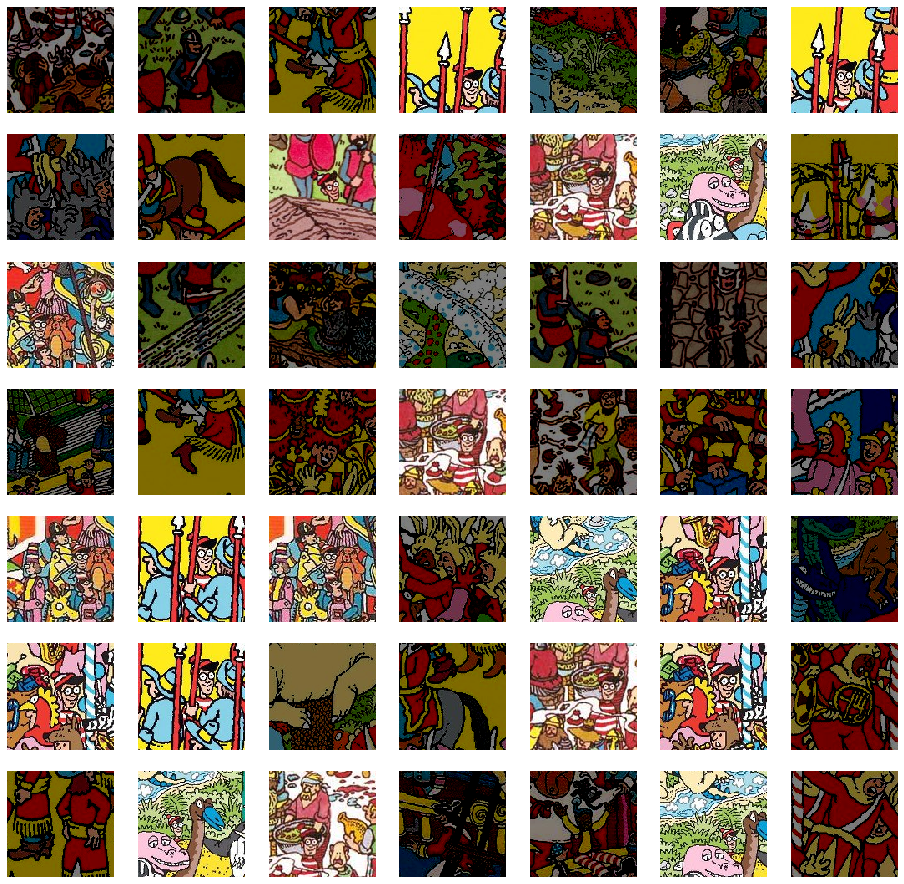

In [0]:
plt.figure(figsize=(16,16))
for i in range(49):
  plt.subplot(7,7,i+1)
  id = np.random.randint(len(x_train))
  temp = cv2.cvtColor(x_train[id], cv2.COLOR_BGR2RGB)
  mask = cv2.cvtColor(y_train[id].astype('float32'), cv2.COLOR_GRAY2RGB)
  mask = cv2.resize(1-mask, (roi_w,roi_h))
  temp = temp/255.0
  temp = temp - mask*0.5
  temp = np.clip(temp, 0, 1)
  plt.imshow(temp)
  plt.grid([])
  plt.xticks([])
  plt.yticks([])

In [0]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()

backbone = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)

for layer in backbone.layers:
  layer.trainable = False
  
backbone_out = backbone.get_layer('block5_conv3').output

conv = keras.layers.Conv2D(512,
                           kernel_size=(3, 3),
                           padding='same')(backbone_out)

# predict whether there is waldo in the box or not
box_prediction = keras.layers.Conv2D(1,
                                     kernel_size=(1, 1),
                                     activation='sigmoid')(conv)

# predict the box coordinates (it is time consuming, we just do box_prediction)
# box_regress = keras.layers.Conv2D(4,
#                                   kernel_size=(1, 1))(conv)
# model = keras.models.Model(backbone.input, [box_prediction, box_regression])

model = keras.models.Model(backbone.input, box_prediction)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(x_train),
          np.expand_dims(np.array(y_train), axis=3),
          epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
12224/12224 [==============================] - 46s 4ms/sample - loss: 35.8490 - acc: 0.8552
Epoch 2/3
12224/12224 [==============================] - 42s 3ms/sample - loss: 8.5969 - acc: 0.8903
Epoch 3/3
12224/12224 [==============================] - 42s 3ms/sample - loss: 8.4781 - acc: 0.8913


# LSTM

## Read Stock Prices from Yahoo

In [1]:
!pip install lxml
!pip install yahoo_fin

In [8]:
from yahoo_fin import stock_info as si

# Fetch stock data for Amazon
data = si.get_data('AMZN', start_date='01/01/2015', end_date='04/01/2019')
print(data)

                   open         high          low        close     adjclose  \
date                                                                          
2015-01-02   312.579987   314.750000   306.959991   308.519989   308.519989   
2015-01-05   307.010010   308.380005   300.850006   302.190002   302.190002   
2015-01-06   302.239990   303.000000   292.380005   295.290009   295.290009   
2015-01-07   297.500000   301.279999   295.329987   298.420013   298.420013   
2015-01-08   300.320007   303.140015   296.109985   300.459991   300.459991   
2015-01-09   301.480011   302.869995   296.679993   296.929993   296.929993   
2015-01-12   297.559998   298.510010   289.279999   291.410004   291.410004   
2015-01-13   297.480011   301.500000   293.230011   294.739990   294.739990   
2015-01-14   291.929993   295.910004   286.500000   293.269989   293.269989   
2015-01-15   294.000000   296.000000   286.820007   286.950012   286.950012   
2015-01-16   286.279999   290.790009   285.250000   

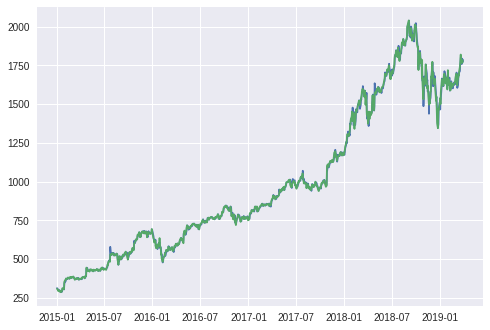

In [10]:
import matplotlib.pyplot as plt

plt.plot(data.index, data[['open', 'close']].values)
plt.show()

## Building the model

In [0]:
data_train = si.get_data('AMZN', start_date='01/01/2015', end_date='08/31/2018')
data_test = si.get_data('AMZN', start_date='09/01/2018')

D = 60  # How many days of input?
d = 1  # How many days of prediction?

X_train = []
Y_train = []
for i in range(D, len(data_train)-d):
  hist = data_train[['open', 'close', 'high', 'low', 'adjclose', 'volume']].values[i-D:i, :]
  future = data_train['close'].values[i:i+d]
  X_train.append(hist)
  Y_train.append(future)
  
X_test = []
Y_test = []
for i in range(D, len(data_test)-d):
  hist = data_test[['open', 'close', 'high', 'low', 'adjclose', 'volume']].values[i-D:i, :]
  future = data_test['close'].values[i:i+d]
  X_test.append(hist)
  Y_test.append(future)

In [13]:
import numpy as np

print(np.array(X_train).shape, np.array(Y_train).shape)

(862, 60, 6) (862, 1)


In [16]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.LSTM(32,  # number of intermediary attributes to produce
                            return_sequences=True,  # if False: take sequence, output a number. If True: take a sequence, output a sequence of the same length
                            input_shape=(D, 6)  # 6 attributes
                           ))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(d))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            4992      
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,665
Trainable params: 21,665
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam')
model.fit(np.array(X_train), np.array(Y_train), epochs=100, validation_split=0.2)

Train on 689 samples, validate on 173 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
689/689 [==============================] - 14s 20ms/sample - loss: 590393.8467 - val_loss: 2518108.3049
Epoch 2/100
689/689 [==============================] - 10s 14ms/sample - loss: 585664.2161 - val_loss: 2509182.4220
Epoch 3/100
689/689 [==============================] - 9s 14ms/sample - loss: 582269.4140 - val_loss: 2504533.1951
Epoch 4/100
689/689 [==============================] - 9s 14ms/sample - loss: 580552.8174 - val_loss: 2501578.7659
Epoch 5/100
689/689 [==============================] - 10s 14ms/sample - loss: 579230.1263 - val_loss: 2498789.7269
Epoch 6/100
689/689 [==============================] - 9s 14ms/sample - loss: 577963.3318 - val_loss: 2496162.1329
Epoch 7/100
689/689 [==============================] - 10s 14ms/sample - loss: 576748.3691 - val_loss: 2493599.4075
Epoch 8/100
689/689 [==============================] - 10s 14ms/sample - loss: 575562.3315 - val_

KeyboardInterrupt: ignored

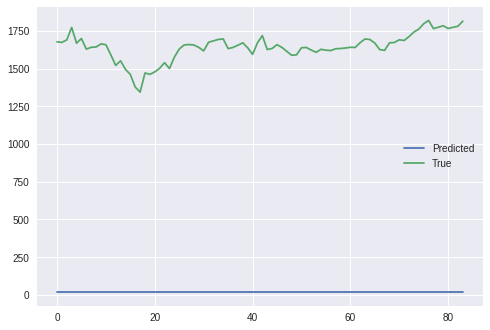

In [19]:
Y_pred = model.predict(np.array(X_test))

plt.plot(Y_pred, label='Predicted')
plt.plot(Y_test, label='True')
plt.legend()
plt.show()

Because we used MSE, LSTM simply learns to output the observed value of the previous day as the prediction of today!!!

## How to normalize the input (to improve MSE)
Solution 1: Use mean and standard deviation of the training to normalize.

Drawback: Stock price is too dynamic.

Solution 2: ??

Solution 3: predict a line first, and then predict the offset from that line using LSTM.